In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc

sc.settings.verbosity = 1
sc.logging.print_versions()

scanpy==1.4.3 anndata==0.6.19 umap==0.3.8 numpy==1.15.4 scipy==1.2.1 pandas==0.23.4 scikit-learn==0.20.1 statsmodels==0.9.0 python-igraph==0.7.1+4.bed07760 louvain==0.6.1 


In [2]:
sc.settings.set_figure_params(dpi=80, dpi_save=300, frameon=False, vector_friendly = True)

In [3]:
adata = sc.datasets.paul15()

... storing 'paul15_clusters' as categorical


In [4]:
sc.pp.recipe_zheng17(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X_diffmap')
sc.tl.louvain(adata, resolution=1)
adata.obs['louvain_anno'] = adata.obs['louvain']
adata.obs['louvain_anno'].cat.categories = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10/Ery', '11', '12',
       '13', '14', '15', '16/Stem', '17', '18', '19/Neu', '20/Mk', '21', '22/Baso', '23', '24/Mo']
adata=adata[~adata.obs["louvain_anno"].isin(["21", "23"])]

# Figure 2a

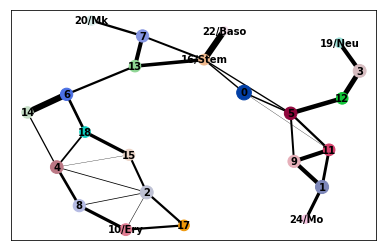

In [5]:
sc.tl.paga(adata, groups='louvain_anno')
sc.pl.paga(adata, threshold=0.03)

# Figure 2b

In [1]:
import fa2

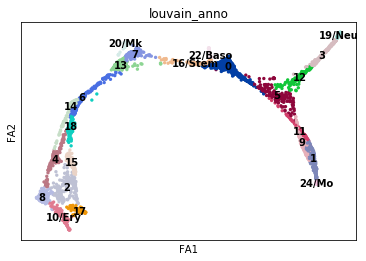

In [11]:
sc.pp.neighbors(adata, n_neighbors=100, use_rep='X_diffmap', n_pcs = 50)
sc.tl.draw_graph(adata, init_pos='paga', layout = 'fa')
sc.pl.draw_graph(adata, color = ["louvain_anno"], legend_loc = "on data")

# Figure 2c

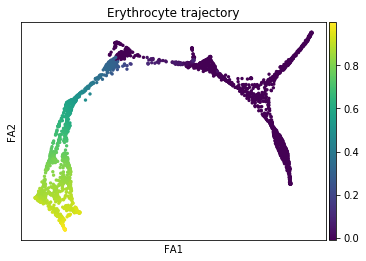

In [12]:
ok=adata.obs["louvain_anno"].isin(["16/Stem","13","6","14","18","4","15","2","8","10/Ery","17"])
subset_ery=adata[ok]
sc.tl.diffmap(subset_ery)
subset_ery.uns['iroot']=np.flatnonzero(subset_ery.obs['louvain_anno'] == '16/Stem')[0]
sc.tl.dpt(subset_ery)
adata.obs['Ery_dpt'] = -0.01
adata.obs.loc[subset_ery.obs_names,'Ery_dpt'] = subset_ery.obs["dpt_pseudotime"]
sc.pl.draw_graph(adata, color = ["Ery_dpt"], legend_loc = "on data",title="Erythrocyte trajectory")

# Figure 2d

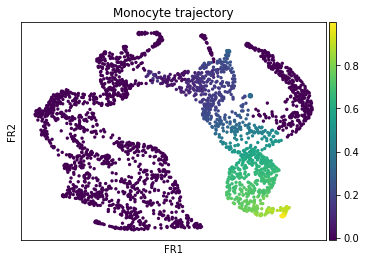

In [7]:
ok=adata.obs["louvain_anno"].isin(["16/Stem","0","5","11","9","1","24/Mo"])
subset_mono=adata[ok]
sc.tl.diffmap(subset_mono)
subset_mono.uns['iroot']=np.flatnonzero(subset_mono.obs['louvain_anno'] == '16/Stem')[0]
sc.tl.dpt(subset_mono)
adata.obs['Mono_dpt'] = -0.01
adata.obs.loc[subset_mono.obs_names,'Mono_dpt'] = subset_mono.obs["dpt_pseudotime"]
sc.pl.draw_graph(adata, color = ["Mono_dpt"], legend_loc = "on data",title="Monocyte trajectory")

# Figure 2e

In [10]:
import DrivAER as dv
C3_mouse = dv.get_anno(filename="C3.gmt",filetype="gmt",conv_mouse=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scanpy/api/__init__.py:6: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning
Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/kopt/config.py:60: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  _config = yaml.load(open(_config_path))


In [11]:
adata_raw = sc.datasets.paul15()
ery = adata_raw[subset_ery.obs_names,:]
ery = ery[:,subset_ery.var_names]

... storing 'paul15_clusters' as categorical
Trying to set attribute `.uns` of view, making a copy.


In [15]:
res1 = dv.calc_relevance(count=ery,pheno=subset_ery.obs['dpt_pseudotime'],tf_targets=C3_mouse,min_targets=20)

1 / 94
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
dca: Successfully preprocessed 21 genes and 1254 cells.
dca: Calculating low dimensional representations...
2 / 94
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
dca: Successfully preprocessed 21 genes and 1254 cells.
dca: Calculating low dimensional representations...
3 / 94
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs

    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
dca: Successfully preprocessed 22 genes and 1254 cells.
dca: Calculating low dimensional representations...
21 / 94
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
dca: Successfully preprocessed 23 genes and 1254 cells.
dca: Calculating low dimensional representations...
22 / 94
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
dca: Successfully preprocessed 22 genes

40 / 94
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
dca: Successfully preprocessed 21 genes and 1254 cells.
dca: Calculating low dimensional representations...
41 / 94
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
dca: Successfully preprocessed 24 genes and 1254 cells.
dca: Calculating low dimensional representations...
42 / 94
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.

    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
dca: Successfully preprocessed 20 genes and 1254 cells.
dca: Calculating low dimensional representations...
60 / 94
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
dca: Successfully preprocessed 20 genes and 1254 cells.
dca: Calculating low dimensional representations...
61 / 94
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
dca: Successfully preprocessed 20 genes

dca: Calculating low dimensional representations...
79 / 94
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
dca: Successfully preprocessed 36 genes and 1254 cells.
dca: Calculating low dimensional representations...
80 / 94
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
dca: Successfully preprocessed 41 genes and 1254 cells.
dca: Calculating low dimensional representations...
81 / 94
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_c

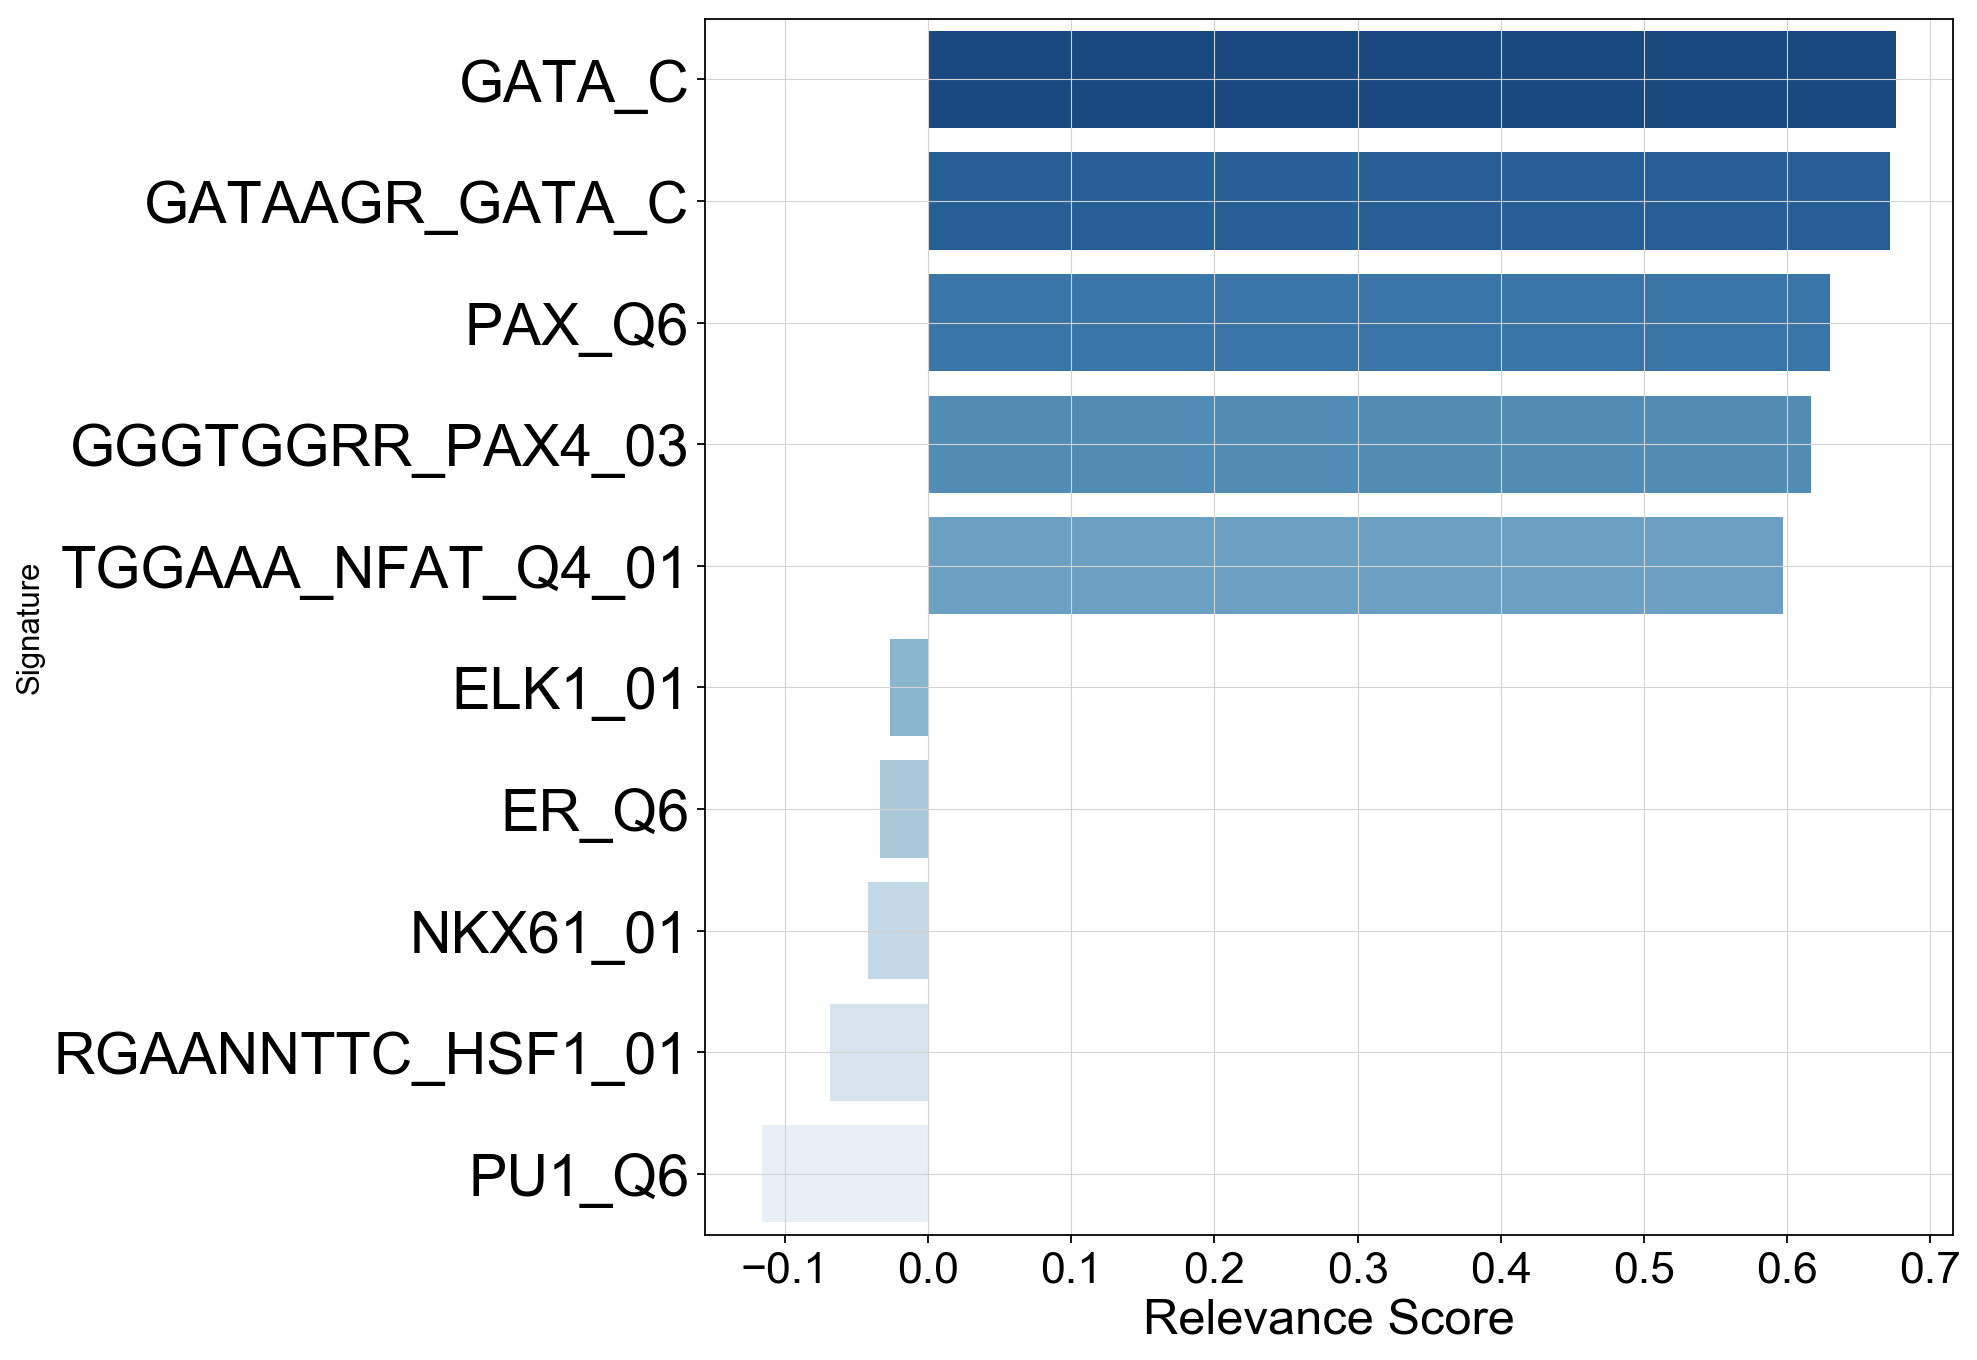

Top_TF : ['GATA_C', 'GATAAGR_GATA_C', 'PAX_Q6', 'GGGTGGRR_PAX4_03', 'TGGAAA_NFAT_Q4_01']
Worse_TF : ['ELK1_01', 'ER_Q6', 'NKX61_01', 'RGAANNTTC_HSF1_01', 'PU1_Q6']


In [14]:
dv.rank_plot(result=res1)

# Figure 2f

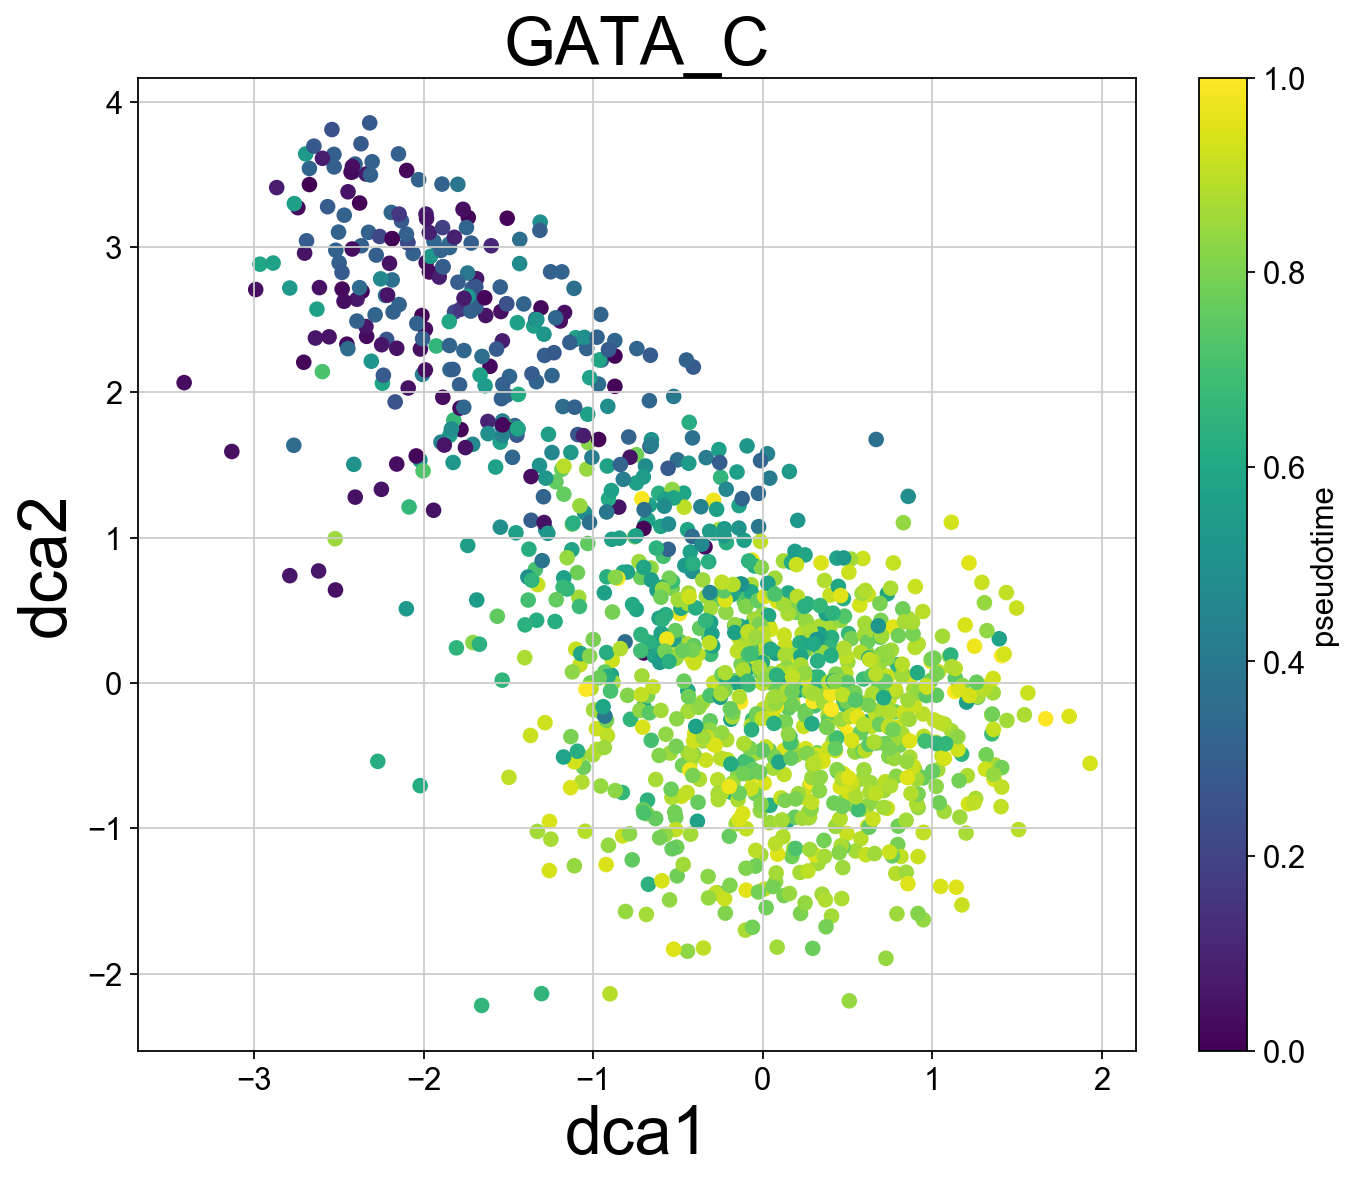

In [15]:
dv.embedding_plot(result=res1, tf_name="GATA_C", pheno=subset_ery.obs['dpt_pseudotime'])

# Figure 2g

In [16]:
def heatmap(gene_set,tf_name,result,count,pt):
    sc.pp.filter_genes(count,min_cells=1)
    targets = gene_set[tf_name]
    targets = list(set(targets) & set(count.var_names))
    dca_f = pd.DataFrame(result[0][tf_name])
    dv.dca_drivaer(count, mode = "denoise", ae_type = "nb-conddisp",early_stop=3, hidden_size=(8, 2, 8), verbose=False)
    fit = pd.DataFrame(count[:,targets].X, columns=targets)
    return pt,dca_f,fit,tf_name

In [17]:
a = heatmap(gene_set=C3_mouse,tf_name='GATA_C',count=ery,
            pt=subset_ery.obs['dpt_pseudotime'],result=res1)
pt = a[0]
dca = a[1]
fit = a[2]
tf_name = a[3]

Trying to set attribute `.var` of view, making a copy.


2019-12-05 14:59:21,276 [WARNING] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/DrivAER-0.0.1-py3.7.egg/DrivAER/dca_drivaer.py:172: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.



dca: Successfully preprocessed 995 genes and 1254 cells.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2019-12-05 14:59:21,402 [WARNING] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2019-12-05 14:59:21,718 [WARNING] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dca/train.py:41: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



2019-12-05 14:59:21,720 [WARNING] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dca/train.py:41: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



2019-12-05 14:59:21,829 [WARNING] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dca/loss.py:87: The name tf.lgamma is deprecated. Please use tf.math.lgamma instead.



2019-12-05 14:59:21,849 [WARNING] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dca/loss.py:88: The name tf.log is deprecated. Please use tf.math.log instead.



2019-12-05 14:59:21,886 [WARNING] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dca/loss.py:10: The name tf.is_nan is deprecated. Please use tf.math.is_nan instead.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2019-12-05 14:59:21,894 [WARNING] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dca/loss.py:10: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2019-12-05 14:59:23,761 [WARNING] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



dca: Calculating reconstructions...


In [18]:
%load_ext rpy2.ipython

In [19]:
%R -i pt,dca,fit,tf_name

In [20]:
%%R
library(pheatmap)
library(viridis)
fitted <- t(apply(fit,2,function(x) (x-mean(x))/sd(x)))
colnames(fitted) <- seq(1:ncol(fitted))
fitted[fitted>2] <- 2
fitted[fitted < -2] <- -2
tf <- t(dca)
o <- order(pt)
anno_col <- data.frame(TF_dca2 = tf[2,o],
                       TF_dca1 = tf[1,o],
                       Pseudotime = pt[o])
fit_o <- fitted[,o]
rownames(anno_col) <- colnames(fit_o)
pheatmap(fit_o,cluster_rows=T,cluster_cols=F,annotation_col = anno_col,
         annotation_colors = list(Pseudotime = viridis(20)),
         show_colnames = F,fontsize_row = 8,width=11,height=8.5,units="inch",main='GATA_C',
         filename = "GATA_C.pdf")

2019-12-05 14:59:38,548 [WARNING] R[write to console]: Loading required package: viridisLite



# Figure 2h

In [21]:
adata_raw = sc.datasets.paul15()
mono = adata_raw[subset_mono.obs_names,:]
mono = mono[:,subset_mono.var_names]

... storing 'paul15_clusters' as categorical
Trying to set attribute `.uns` of view, making a copy.


In [14]:
res2 = dv.calc_relevance(count = mono, pheno = subset_mono.obs['dpt_pseudotime'], 
                         tf_targets = C3_mouse, min_targets=20)

filtered out 7 genes that are detectedin less than 1 counts


Trying to set attribute `.var` of view, making a copy.


1 / 92
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)



2019-11-25 17:03:23,233 [WARNING] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/DrivAER-0.0.1-py3.7.egg/DrivAER/dca_drivaer.py:172: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.



normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
dca: Successfully preprocessed 21 genes and 959 cells.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2019-11-25 17:03:23,302 [WARNING] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2019-11-25 17:03:23,670 [WARNING] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dca/train.py:41: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



2019-11-25 17:03:23,672 [WARNING] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dca/train.py:41: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



2019-11-25 17:03:23,743 [WARNING] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dca/loss.py:87: The name tf.lgamma is deprecated. Please use tf.math.lgamma instead.



2019-11-25 17:03:23,758 [WARNING] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dca/loss.py:88: The name tf.log is deprecated. Please use tf.math.log instead.



2019-11-25 17:03:23,785 [WARNING] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dca/loss.py:10: The name tf.is_nan is deprecated. Please use tf.math.is_nan instead.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2019-11-25 17:03:23,794 [WARNING] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dca/loss.py:10: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2019-11-25 17:03:25,622 [WARNING] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



dca: Calculating low dimensional representations...
2 / 92
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
dca: Successfully preprocessed 21 genes and 959 cells.
dca: Calculating low dimensional representations...
3 / 92
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
dca: Successfully preprocessed 20 genes and 959 cells.
dca: Calculating low dimensional representations...
4 / 92
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
dca: Successfully preprocessed 22 genes and 959 cells.
dca: Calculating low dimensional representations...
22 / 92
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
dca: Successfully preprocessed 27 genes and 959 cells.
dca: Calculating low dimensional representations...
23 / 92
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
dca: 

dca: Calculating low dimensional representations...
41 / 92
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
dca: Successfully preprocessed 24 genes and 959 cells.
dca: Calculating low dimensional representations...
42 / 92
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
dca: Successfully preprocessed 22 genes and 959 cells.
dca: Calculating low dimensional representations...
43 / 92
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_cou

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
dca: Successfully preprocessed 25 genes and 959 cells.
dca: Calculating low dimensional representations...
61 / 92
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
dca: Successfully preprocessed 75 genes and 959 cells.
dca: Calculating low dimensional representations...
62 / 92
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
dca: 

dca: Calculating low dimensional representations...
80 / 92
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
dca: Successfully preprocessed 63 genes and 959 cells.
dca: Calculating low dimensional representations...
81 / 92
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
dca: Successfully preprocessed 49 genes and 959 cells.
dca: Calculating low dimensional representations...
82 / 92
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_cou

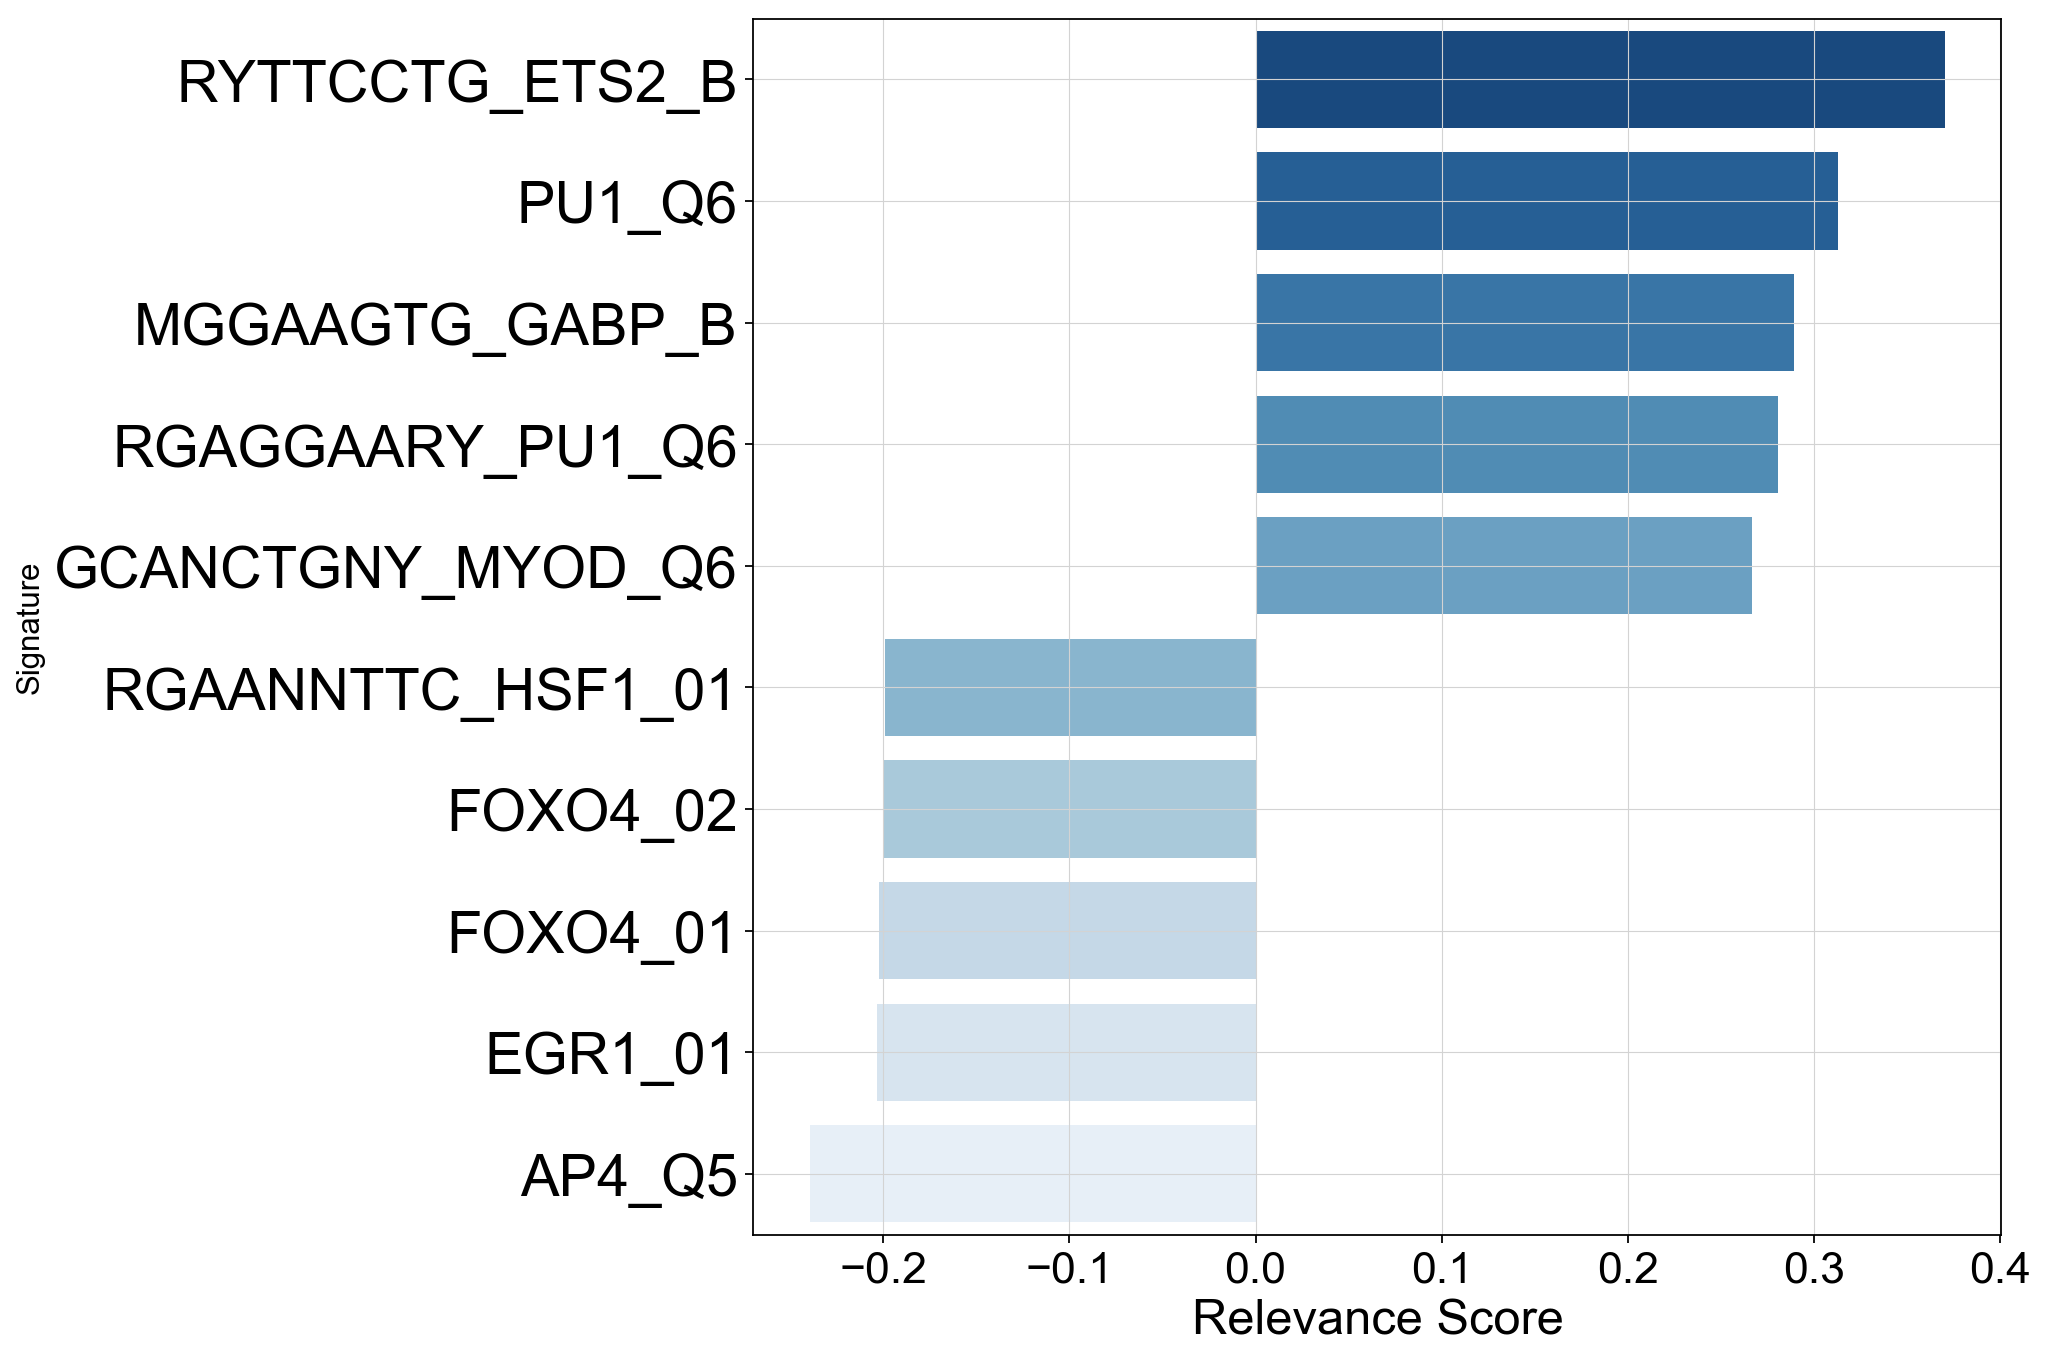

Top_TF : ['RYTTCCTG_ETS2_B', 'PU1_Q6', 'MGGAAGTG_GABP_B', 'RGAGGAARY_PU1_Q6', 'GCANCTGNY_MYOD_Q6']
Worse_TF : ['RGAANNTTC_HSF1_01', 'FOXO4_02', 'FOXO4_01', 'EGR1_01', 'AP4_Q5']


In [23]:
dv.rank_plot(result=res2)

# Figure 2i

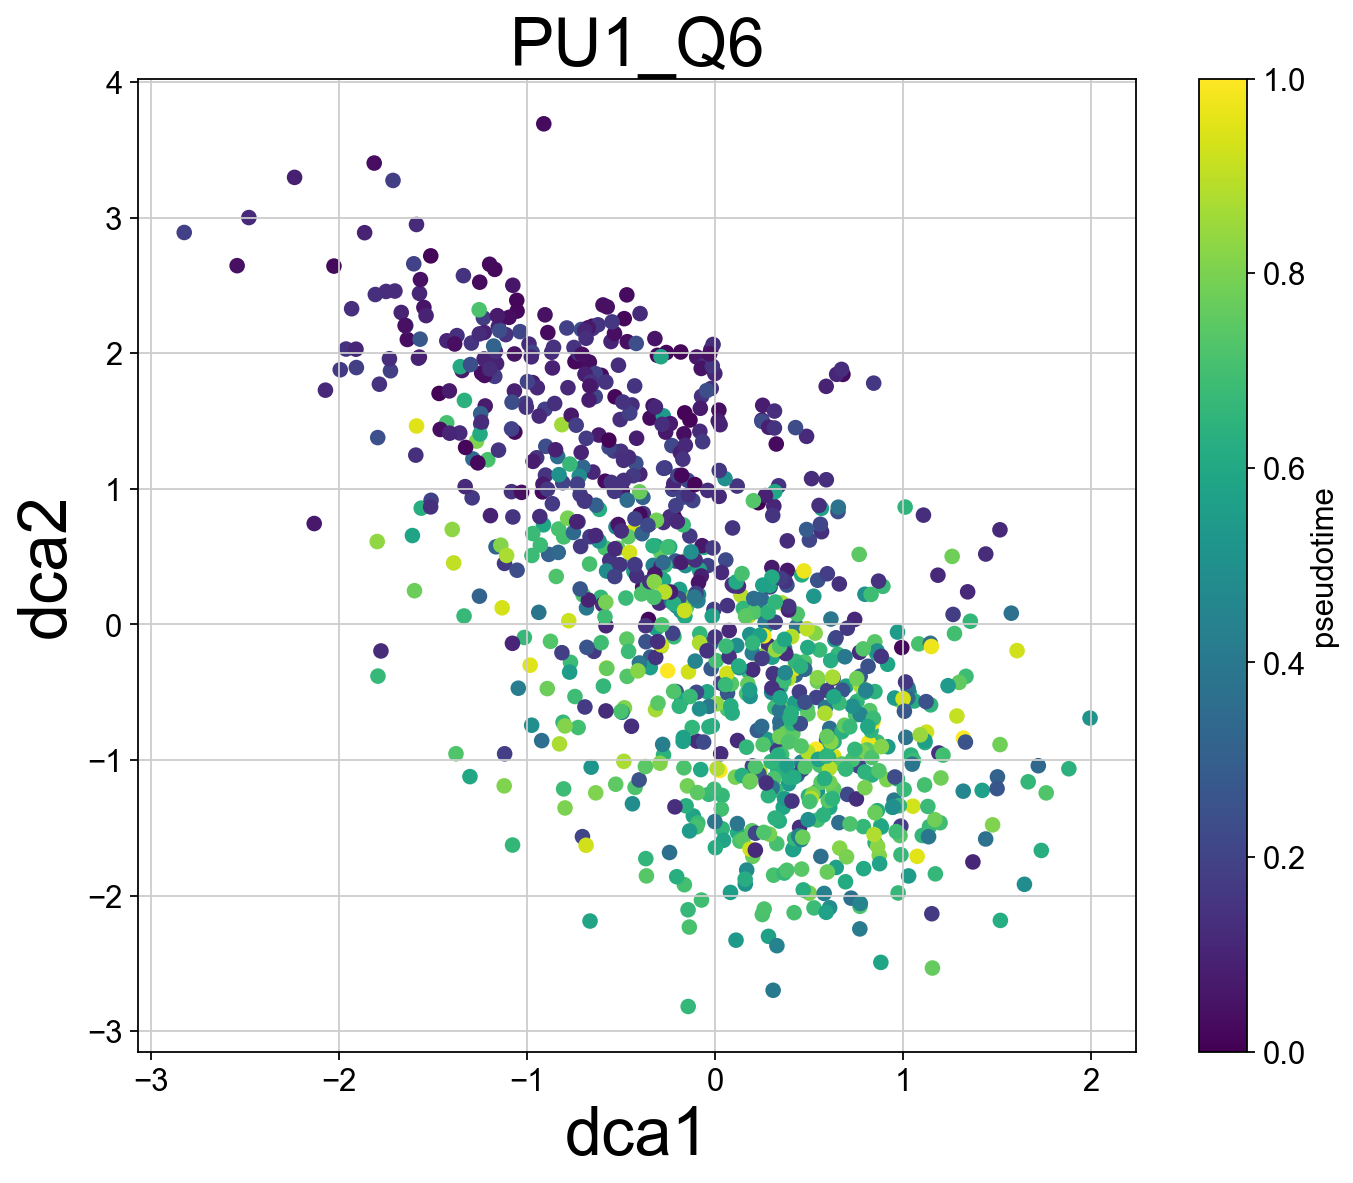

In [24]:
dv.embedding_plot(result=res2, tf_name="PU1_Q6", pheno=subset_mono.obs['dpt_pseudotime'])

# Figure 2j

In [25]:
def heatmap(gene_set,tf_name,result,count,pt):
    sc.pp.filter_genes(count,min_cells=1)
    targets = gene_set[tf_name]
    targets = list(set(targets) & set(count.var_names))
    dca_f = pd.DataFrame(result[0][tf_name])
    dv.dca_drivaer(count, mode = "denoise", ae_type = "nb-conddisp",early_stop=3, hidden_size=(8, 2, 8), verbose=False)
    fit = pd.DataFrame(count[:,targets].X, columns=targets)
    return pt,dca_f,fit,tf_name

In [26]:
b = heatmap(gene_set=C3_mouse,tf_name='AP4_Q5',count=mono,
            pt=subset_mono.obs['dpt_pseudotime'],result=res2)
pt = b[0]
dca = b[1]
fit = b[2]
tf_name = b[3]

Trying to set attribute `.var` of view, making a copy.


dca: Successfully preprocessed 993 genes and 959 cells.
dca: Calculating reconstructions...


In [27]:
%R -i pt,dca,fit,tf_name

In [29]:
%%R
library(pheatmap)
library(viridis)
fitted <- t(apply(fit,2,function(x) (x-mean(x))/sd(x)))                 
colnames(fitted) <- seq(1:ncol(fitted))
fitted[fitted > 2] <- 2
fitted[fitted < -2] <- -2
tf <- t(dca)
o <- order(pt)
anno_col <- data.frame(TF_dca2 = tf[2,o],
                       TF_dca1 = tf[1,o],
                       Pseudotime = pt[o])
fit_o <- fitted[, o]
rownames(anno_col) <- colnames(fit_o)
pheatmap(fit_o,cluster_rows=T,cluster_cols=F,annotation_col = anno_col, 
         annotation_colors = list(Pseudotime = viridis(20)),
         show_colnames = F,fontsize_row = 8,width=11,height=8.5,units="inch",main="PU1_Q6",
         filename = "PU1_Q6.pdf")